# Visualization Labs

### Task: We have 12 different CSV files containing crime data for each month of 2020. The resulting dataframe consists of over 1 million records of various crimes recorded in London in the year 2020. 

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

We have 12 different CSV files containing crime data for each month of 2020. We download each of them to the data folder.

In [12]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/crime/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

Downloaded data\2020-08-metropolitan-street.csv
Downloaded data\2020-09-metropolitan-street.csv
Downloaded data\2020-10-metropolitan-street.csv
Downloaded data\2020-11-metropolitan-street.csv
Downloaded data\2020-12-metropolitan-street.csv


### Data Pre-Processing

It will be helpful to merge all 12 CSV files into a single dataframe. We can use pd.concat() to merge a list of dataframes.

In [13]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

### Create a Pie-Chart

Let’s create a pie-chart showing the distribution of different types of crime. Pandas groupby() function allows us to calculate group statistics.

In [14]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

Crime type
Anti-social behaviour           415105
Bicycle theft                    23517
Burglary                         61044
Criminal damage and arson        50923
Drugs                            51629
Other crime                      10066
Other theft                      81924
Possession of weapons             5763
Public order                     53458
Robbery                          27269
Shoplifting                      34588
Theft from the person            31084
Vehicle crime                   108344
Violence and sexual offences    227208
dtype: int64

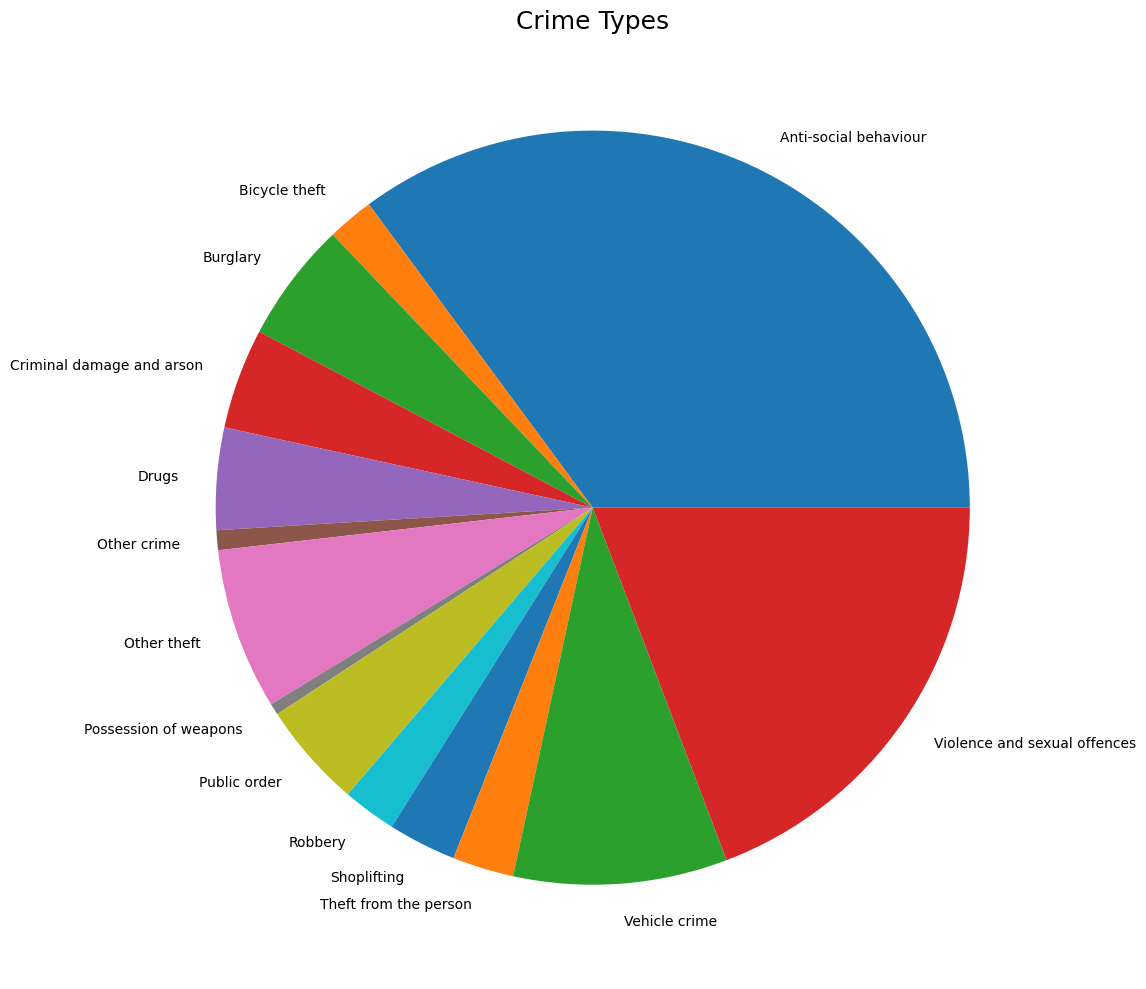

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax)

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

__Matplotlib plots__ offer unlimited possibilities to customize your charts. Let’s see some of the options available to customize the pie-chart.

    wedgeprops: Customize the look of each ‘wedge’ of the pie.
    textprops: Set the text properties of labels.


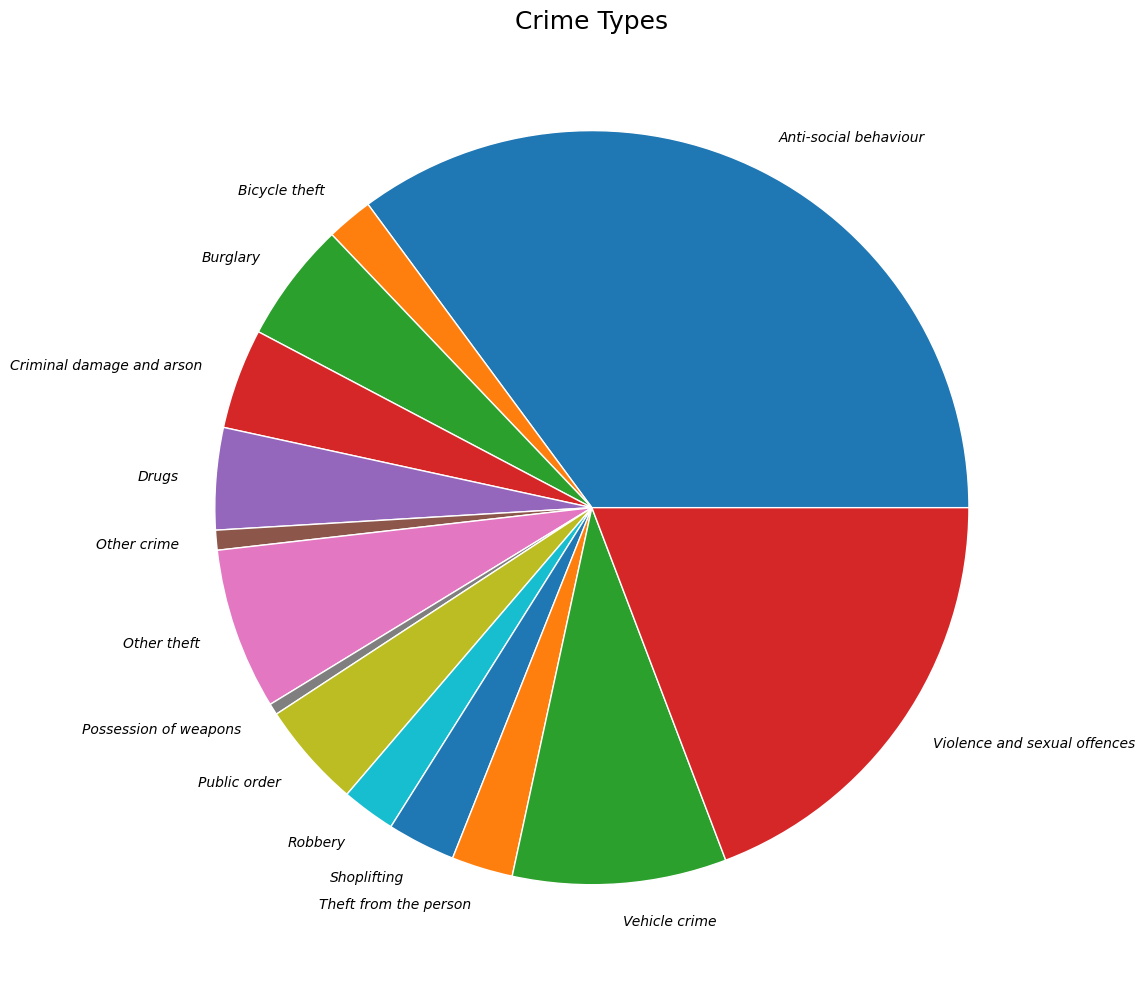

In [16]:
wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
textprops= {'fontsize': 10, 'fontstyle': 'italic'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax, 
                 wedgeprops=wedgeprops,
                 textprops=textprops
                 )

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

## Create a Bar Chart

We can also chart the trend of crime over the year. For this, let’s group the data by month.

In [17]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

Month
2020-01     90979
2020-02     86984
2020-03     87409
2020-04    109951
2020-05    114008
2020-06    100198
2020-07    103657
2020-08    104782
2020-09     99633
2020-10     99471
2020-11     96914
2020-12     87936
dtype: int64

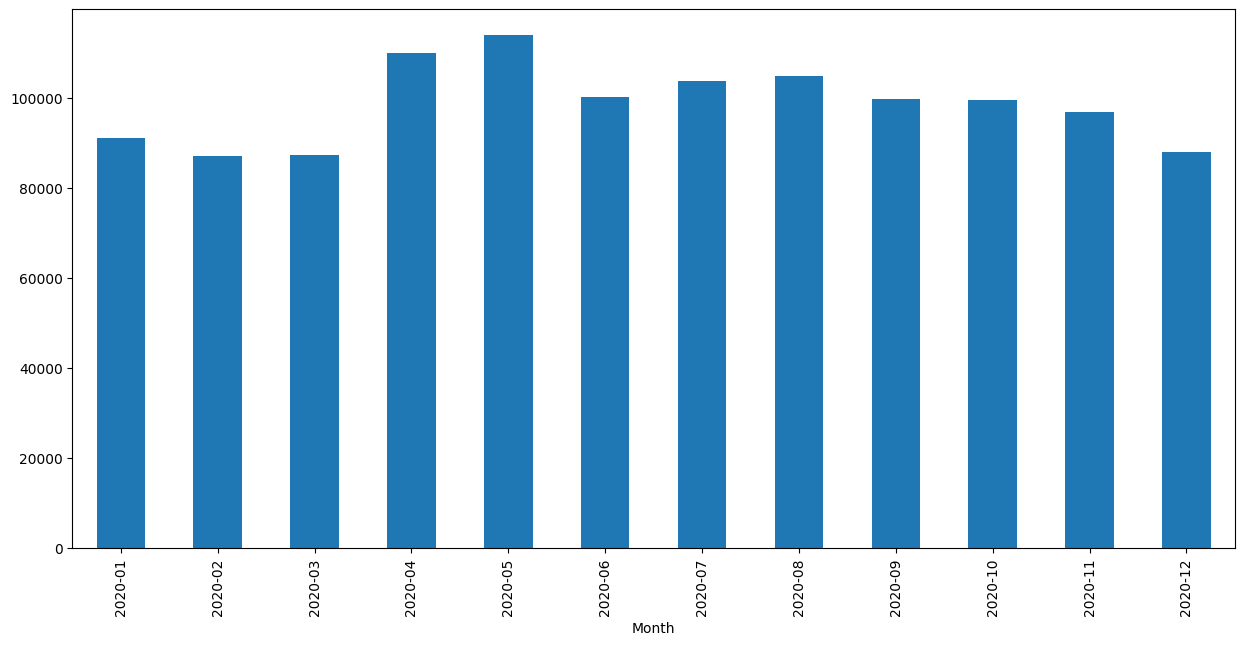

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
monthly_counts.plot(kind='bar', ax=ax)
plt.show()

As we learnt earlier, we can add multiple plots on the same Axes. We can add a line chart along with the bar chart to show the trendline as well. Lastly we add the titles and axis labels to finish the chart.

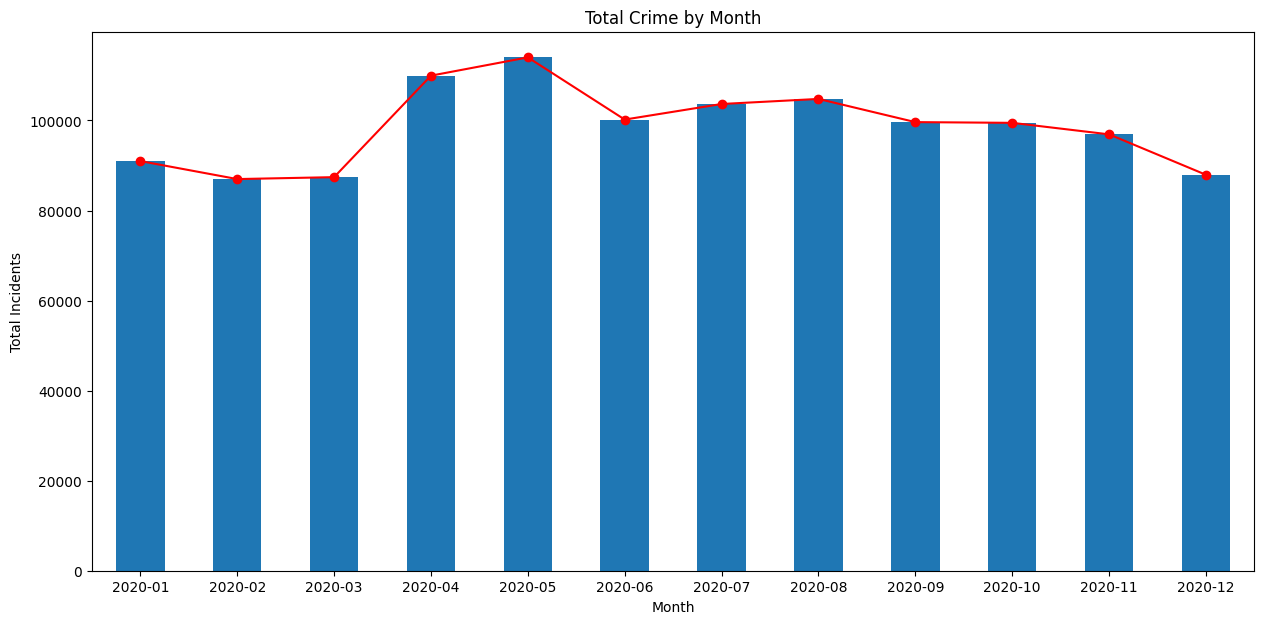

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

Subtask : Define by percentage each crime type!

# Exercise 2

### Subtask 1:
Visualize given weather data like seasonal subplots.
- Subplot-1 : Temperature
- Subplot-2 : Rainfall
- Subplot-3 : Windspeed
- Subplot-4 : Daylight hours

Data available in 'temperature.xlsx' file which is given in data subfolder.

![alt text](data\weather_subplots.png)

### Subtask 2:
Visualize given weather data like seasonal subplots. Data available in 'temperature.xlsx' file which is given in data subfolder.

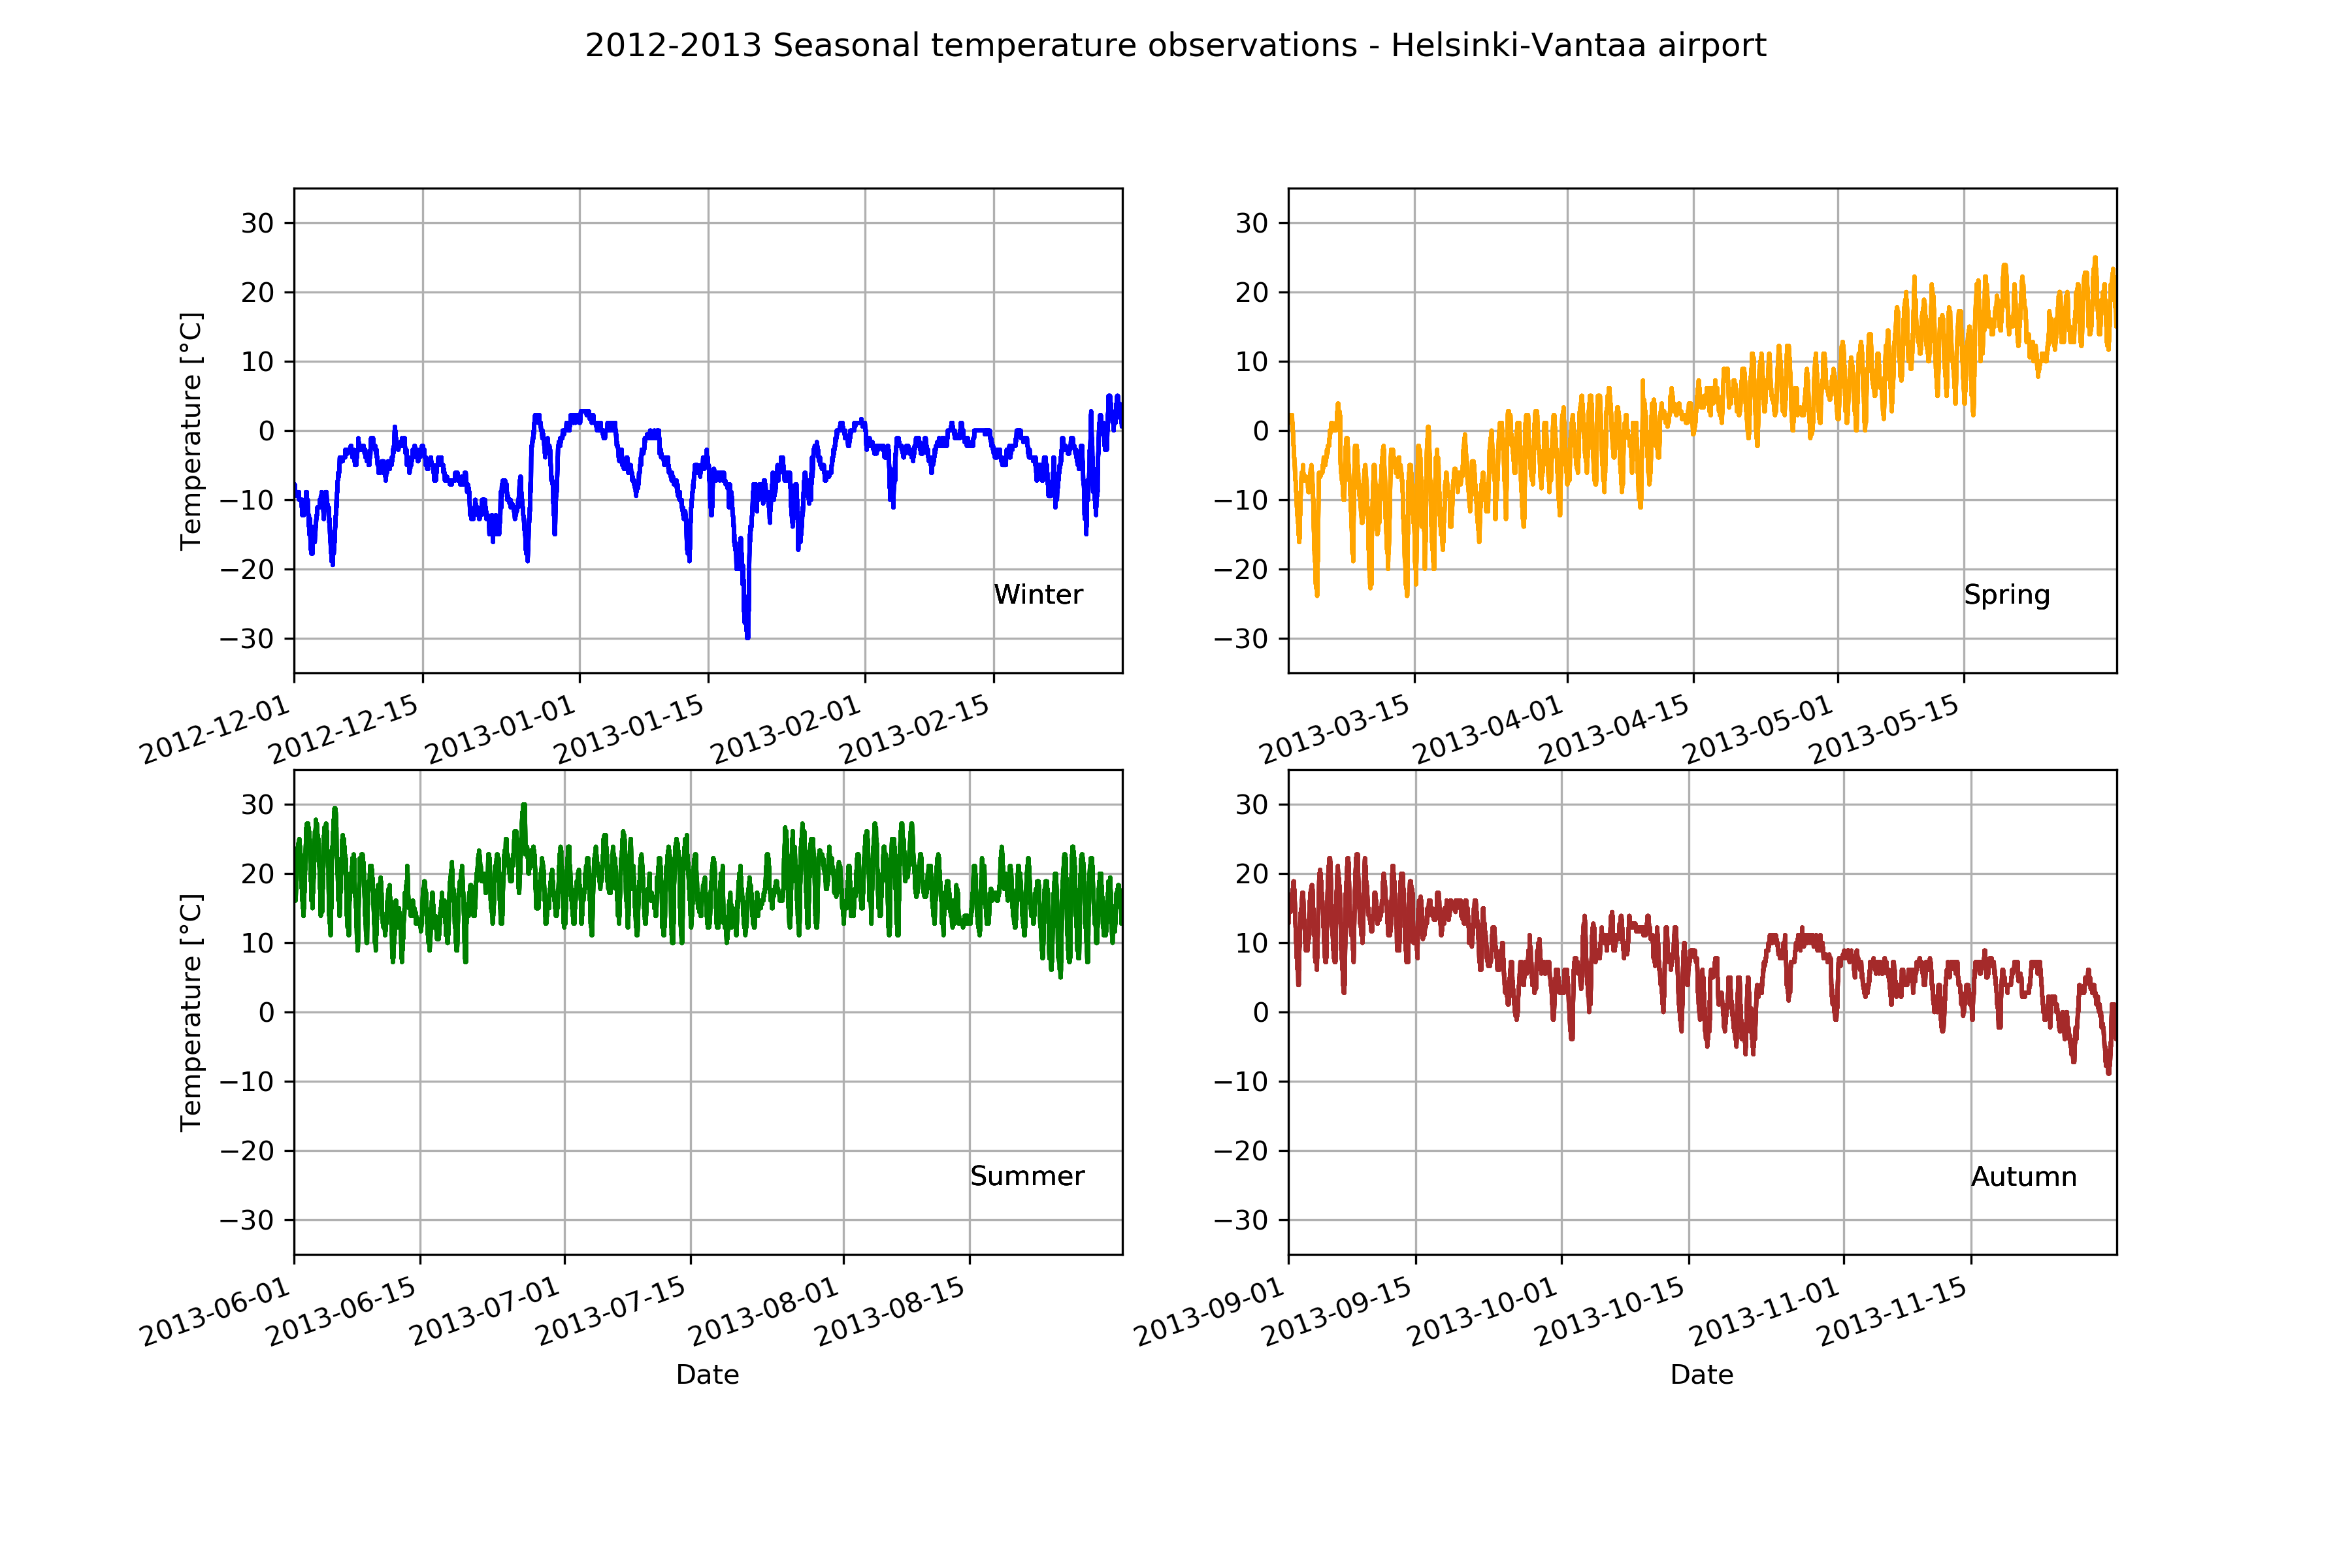